# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change current working directory to project folder (1 mark)

In [0]:
import os
#### Add your code here ####
os.chdir('/content/drive/My Drive/Face Detection - Wide Face Dataset - Mobilenet/')

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [3]:
import numpy as np
# data = #### Add your code here ####
data = np.load('images.npy',allow_pickle=True)
print(data.shape)
print(data.size)

(409, 2)
818


In [4]:
data[1][0]

array([[[207, 216, 227, 255],
        [206, 216, 227, 255],
        [207, 216, 227, 255],
        ...,
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       [[207, 216, 227, 255],
        [207, 216, 227, 255],
        [207, 216, 227, 255],
        ...,
        [ 35,  32,  33, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       [[207, 216, 227, 255],
        [207, 216, 227, 255],
        [207, 215, 227, 255],
        ...,
        [ 35,  33,  33, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       ...,

       [[ 31,  21,  17, 255],
        [ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        ...,
        [  0,   1,   4, 255],
        [  0,   1,   4, 255],
        [  0,   1,   4, 255]],

       [[ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        ...,
        [  0,   1,   4, 255],
        [  0,   1,   4, 255],
        [  0,   1,   4, 255]],

       [[ 31

### Check one sample from the loaded "images.npy" file  (2 marks)

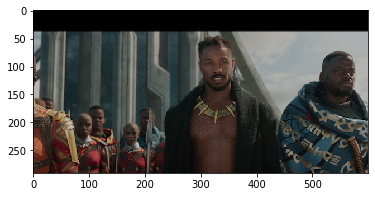

In [5]:
#### Add your code here ####
from matplotlib import pyplot as plt
new_array = data[3][0]
img = new_array
plt.imshow(img)

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224 
#### Add your code here ####
IMAGE_HEIGHT = 224
#### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [7]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [8]:
#### Add your code here ####
print(X_train.shape)


(409, 224, 224, 3)


In [9]:
#### Add your code here ####
print(masks.shape)


(409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

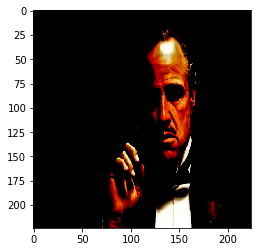

In [10]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

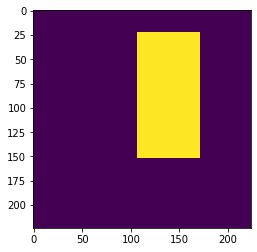

In [11]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
image_size = 224
# Image sizes can vary (128, 160, 192, 224). MobileNetV2 can also take 96

ALPHA = 1.0

WEIGHTS = 'imagenet'

In [13]:
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from tensorflow.keras.backend import epsilon
K.clear_session()

def create_model(trainable=True):
    model = MobileNet(input_shape=(image_size,image_size,3),alpha=ALPHA,weights=WEIGHTS,include_top=False)
    for layer in model.layers:
        layer.trainable = trainable
    
        # Add all the UNET layers here
    #### Add your code here ####
    block1 = model.get_layer("input_1").output ##224
    block2 = model.get_layer("conv_pw_1_relu").output #112
    block3 = model.get_layer("conv_pw_3_relu").output #56
    block4 = model.get_layer("conv_pw_5_relu").output #28
    block5 = model.get_layer("conv_pw_7_relu").output #14
    block6 = model.get_layer("conv_pw_13_relu").output #7

    x = Concatenate()([UpSampling2D()(block6), block5])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((224, 224))(x)

   
    return Model(inputs=model.input, outputs=x)


Using TensorFlow backend.


### Call the create_model function

In [14]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
#### Add your code here ####
PATH = '/content/drive/My Drive/Face Detection - Wide Face Dataset - Mobilenet/models/'
TRAIN_NPY = PATH+"/Data.npy"

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, masks, test_size=0.3, random_state=42)

In [21]:
result = model.fit(X_train,y_train,epochs=100,batch_size=1,callbacks=[checkpoint, reduce_lr, stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 286 samples
Epoch 1/100
284/286 [============================>.] - ETA: 0s - loss: 1.3648 - dice_coefficient: 0.4844
Epoch 00001: loss improved from inf to 1.36729, saving model to model-1.37.h5
286/286 [==============================] - 22s 76ms/sample - loss: 1.3673 - dice_coefficient: 0.4828
Epoch 2/100
284/286 [============================>.] - ETA: 0s - loss: 0.9206 - dice_coefficient: 0.5851
Epoch 00002: loss improved from 1.36729 to 0.92228, saving model to model-0.92.h5
286/286 [==============================] - 13s 44ms/sample - loss: 0.9223 - dice_coefficient: 0.5852
Epoch 3/100
284/286 [============================>.] - ETA: 0s - loss: 0.7546 - dice_coefficient: 0.6408
Epoch 00003: loss improved from 0.92228 to 0.75687, saving model to model-0.76.h5
286/286 [==============================] - 13s 44ms/sample - loss: 0.7569 - dice_coefficient: 0.6395
Epoch 4/100
284/286 [====

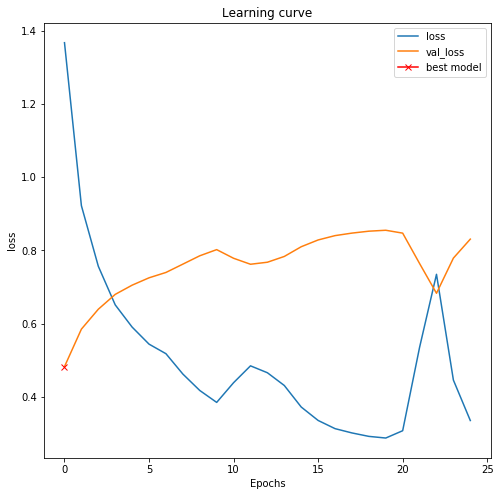

In [22]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(result.history["loss"], label="loss")
plt.plot(result.history["dice_coefficient"], label="val_loss")
plt.plot( np.argmin(result.history["dice_coefficient"]), np.min(result.history["dice_coefficient"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()



### Get the predicted mask for a sample image   (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  5.9604645e-08 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  2.9802322e-08 5.9604645e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4901161e-07
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


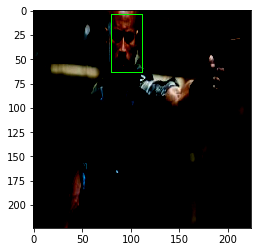

In [23]:
n = 250
sample_image = X_train[n]
IMAGE_SIZE = 224

#sample_image = '/content/drive/My Drive/AIML/Changed Assignment/raw/img1.png'
image_height,image_width,_ = sample_image.shape
#plt.imshow(sample_image)

img = cv2.resize(sample_image, (IMAGE_SIZE, IMAGE_SIZE),3)
#feat_scaled = np.expand_dims(sample_image, axis=0)
scaled = preprocess_input(np.array(img,dtype=np.float32))
#np.expand_dims(sample_image,axis=1)


bbox_pred = model.predict(x=np.array([img]))[0]
print(type(bbox_pred))
print(bbox_pred)



output = np.zeros(sample_image.shape[:2], dtype=np.uint8)
for i in range(bbox_pred.shape[1]):
    for j in range(bbox_pred.shape[0]):
        if bbox_pred[i][j] > 0.6:
            x = int(j * sample_image.shape[1] / IMAGE_WIDTH)
            y = int(i * sample_image.shape[0] / IMAGE_HEIGHT)
            x2 = int((j + 1) * sample_image.shape[1] / IMAGE_WIDTH)
            y2 = int((i + 1) * sample_image.shape[0] / IMAGE_HEIGHT)
            # cv2.rectangle(sample_image, (x, y), (x2, y2), (0, 0, 255), 1)

            output[y:y2,x:x2] = 1

_, contours, _ = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(sample_image, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(sample_image) # Show the image


### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


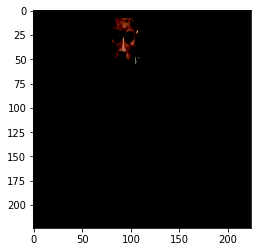

In [24]:
#### Add your code here ####

unscaled = X_train[n]

image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE),3)

feat_scaled = preprocess_input(np.array(unscaled, dtype=np.float32))

pred_mask = cv2.resize(1.0 * (model.predict(x = np.array([image]))[0] > 0.5),(IMAGE_SIZE,IMAGE_SIZE))

image2 = image

image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)



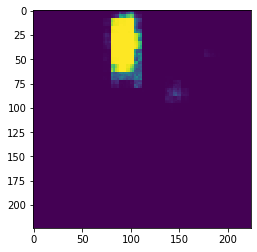

In [25]:
plt.imshow(bbox_pred)

## Conclussion:

The minimum loss observed is 0.33 at 25th Epoch and weight is getting stored in the respective directory.

Face is detected along with the mask/bounding box.
